In [1]:
#import openl3
import os
import numpy as np
import tensorflow
import bokeh
import pandas as pd

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import seaborn as sns

In [2]:
def get_embeddings(files):
   
    result = []
    Data = np.load(files,mmap_mode='r')
    audio_features = Data["embedding"]
    avg_features = audio_features.mean(axis=0)
   
    return avg_features

In [3]:
data = []

flag = 0
flag_array = []

for folder in sorted(os.listdir('/home/mesl/koh_research/aaai/embeddings/train/')):
    flag = flag+1
    flag_array = np.full((512,), flag)
    path = '/home/mesl/koh_research/aaai/embeddings/train/'+folder+'/'

    print (flag, folder)
    print("==============")

    for npz in sorted(os.listdir(path)):
                       
        if '.npz' in npz:
            fileName, fileExtension = os.path.splitext(npz)
            
            npzpath = path + npz
            embeddings = get_embeddings(npzpath)
            data.append((flag_array, embeddings))

1 angry_q2
2 happy_q1
3 peaceful_q4
4 sad_q3


In [4]:
df = pd.DataFrame(data, columns=['Folder', 'Embed'])
print (df)

                                                Folder  \
0    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
1    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
2    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
3    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
4    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
..                                                 ...   
739  [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...   
740  [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...   
741  [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...   
742  [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...   
743  [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...   

                                                 Embed  
0    [2.602284, 1.9240947, 2.9691825, 2.0971665, 2....  
1    [2.210433, 1.9805816, 3.0046158, 2.3271592, 1....  
2    [2.5621693, 2.5577226, 3.0696821, 1.7912003, 1...  
3    [2.4411745, 2.18425, 3.143267, 1.6783996, 2.33...  
4    [2.6069555, 1

In [5]:
df

,Folder,Embed
0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2.602284, 1.9240947, 2.9691825, 2.0971665, 2...."
1,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2.210433, 1.9805816, 3.0046158, 2.3271592, 1...."
2,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2.5621693, 2.5577226, 3.0696821, 1.7912003, 1..."
3,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2.4411745, 2.18425, 3.143267, 1.6783996, 2.33..."
4,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2.6069555, 1.8748348, 3.5576122, 2.1840353, 2..."
...,...,...
739,"[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...","[2.6587641, 2.3690047, 3.8572044, 2.2342744, 2..."
740,"[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...","[2.4637456, 2.0439384, 3.1990118, 2.005573, 2...."
741,"[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...","[2.2639265, 2.7766752, 3.5032697, 2.7964485, 2..."
742,"[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...","[2.420479, 2.1853614, 2.9573848, 1.6536711, 2...."


In [6]:
df["Embed"][0].shape

(512,)

In [7]:
temp = np.zeros((744,512))
for i in range(744):
    temp[i] = df['Embed'].values[i]

In [8]:
temp.shape

(744, 512)

In [9]:
temp_valid = np.zeros((744,512)) 
for i in range(744):
    temp_valid[i] = df['Folder'].values[i]

In [10]:
temp_valid.shape

(744, 512)

In [11]:
temp

array([[2.60228395, 1.92409468, 2.96918249, ..., 1.5697093 , 2.96076655,
        2.77480149],
       [2.21043301, 1.98058164, 3.00461578, ..., 2.31909895, 2.83450866,
        2.58847237],
       [2.56216931, 2.55772257, 3.06968212, ..., 1.5308193 , 3.49337173,
        3.23071694],
       ...,
       [2.26392651, 2.77667522, 3.50326967, ..., 1.85600185, 3.62606335,
        2.99332952],
       [2.42047906, 2.18536139, 2.95738482, ..., 1.53555608, 3.13010335,
        2.34072757],
       [2.79245925, 2.41427612, 3.46658397, ..., 2.35139108, 2.93064547,
        2.72032571]])

In [12]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(temp)

In [13]:
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1]
df['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.21436871 0.15335999 0.08916732]


In [14]:
rndperm = np.random.permutation(df.shape[0])
print (len(rndperm))

744


In [15]:
df

,Folder,Embed,pca-one,pca-two,pca-three
0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2.602284, 1.9240947, 2.9691825, 2.0971665, 2....",-1.940452,2.791959,2.659631
1,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2.210433, 1.9805816, 3.0046158, 2.3271592, 1....",-1.305367,5.744969,1.209583
2,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2.5621693, 2.5577226, 3.0696821, 1.7912003, 1...",2.422040,1.286796,-5.131268
3,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2.4411745, 2.18425, 3.143267, 1.6783996, 2.33...",-3.230542,3.677373,-1.014264
4,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2.6069555, 1.8748348, 3.5576122, 2.1840353, 2...",-5.279104,4.065472,0.644857
...,...,...,...,...,...
739,"[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...","[2.6587641, 2.3690047, 3.8572044, 2.2342744, 2...",-4.366256,-2.895152,2.658966
740,"[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...","[2.4637456, 2.0439384, 3.1990118, 2.005573, 2....",-0.572645,2.459134,0.134301
741,"[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...","[2.2639265, 2.7766752, 3.5032697, 2.7964485, 2...",4.052205,-3.082464,-2.855221
742,"[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...","[2.420479, 2.1853614, 2.9573848, 1.6536711, 2....",-1.605926,4.419022,3.406804


In [16]:
df['Folder'].values[0].shape

(512,)

In [17]:
df['Folder'].values.shape

(744,)

In [18]:
temp2 = np.zeros(744)
for i in range(744):
    temp2[i] = df['Folder'].values[i][0]

In [19]:
temp2

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2.

In [20]:
df['y'] = temp2

In [21]:
def f(x):
    return np.int(x)

No handles with labels found to put in legend.


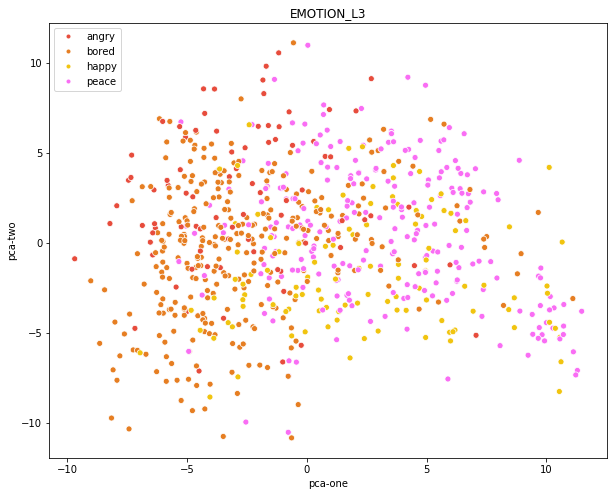

In [22]:
from matplotlib.lines import Line2D

plt.figure(figsize=(10,8))

flatui = ["#E74C3C", "#E67E22", "#F1C40F", "#f96df4"]#,
#            "#1ABC9C", "#3498DB", "#9B59B6", "#34495e"]#,
#           ["#18fa05", "#8F4B2D", "#fba3bf", "#95a5a6"]


sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette(flatui), #muted #hls #Set1
    data=df.loc[rndperm,:],
    legend=False,
    alpha=1
)

custom = [Line2D([], [], marker='.', color="#E74C3C", linestyle='None'),
          Line2D([], [], marker='.', color="#E67E22", linestyle='None'),
          Line2D([], [], marker='.', color="#F1C40F", linestyle='None'),
          Line2D([], [], marker='.', color="#f96df4", linestyle='None')#,
#           Line2D([], [], marker='.', color="#1ABC9C", linestyle='None'),
#           Line2D([], [], marker='.', color="#3498DB", linestyle='None'),#,
#           Line2D([], [], marker='.', color="#9B59B6", linestyle='None'),
#           Line2D([], [], marker='.', color="#34495e", linestyle='None')
# custom =    [Line2D([], [], marker='.', color="#18fa05", linestyle='None'),
#           Line2D([], [], marker='.', color="#8F4B2D", linestyle='None'),
#           Line2D([], [], marker='.', color="#fba3bf", linestyle='None'),
#           Line2D([], [], marker='.', color="#95a5a6", linestyle='None')
         ]

# fig = plt.figure(figsize=(8,5))
plt.legend(loc='upper left')
plt.legend(custom, ['angry','bored','happy','peace'], loc='upper left')
# plt.legend(custom, ['neutral','calm','happy','sad','angry','fearful'], loc='upper left')
# plt.legend(custom, ['neutral','calm','happy','sad','angry','fearful','disgust','surprised'], loc='upper left')


# for line in range(0,1440):
#      p1.text(df["pca-one"][line]+0.01, df["pca-two"][line], 
#      f(df["singer"][line]), horizontalalignment='left', 
#      size='small', color='black', weight='semibold')

plt.title('EMOTION_L3') #PCA_RAVDESS_SPEECH_MFCC #EMOTION_VGG



plt.show()

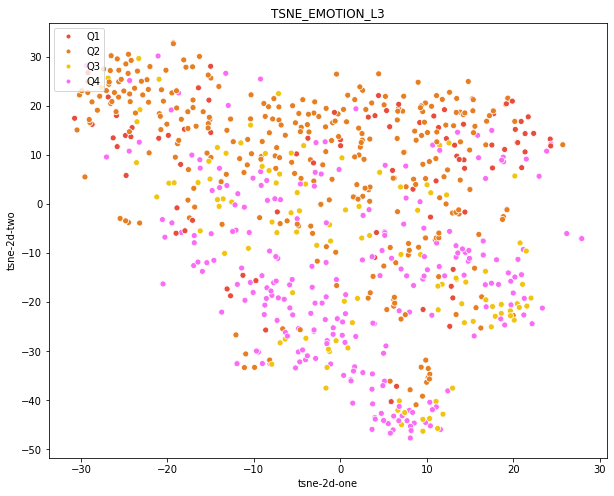

In [23]:
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, perplexity=30.0, early_exaggeration=12.0, learning_rate=200.0,
            n_iter=1000, n_iter_without_progress=300, min_grad_norm=1e-07, metric='euclidean',
            init='random', verbose=0, random_state=None, method='barnes_hut', angle=0.5)



tsne_results = tsne.fit_transform(temp)

# print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))


# In[54]:


df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]


flatui = ["#E74C3C", "#E67E22", "#F1C40F", "#f96df4"]#,
#            "#1ABC9C", "#3498DB", "#9B59B6", "#34495e"]#,
#           "#18fa05", "#8F4B2D", "#fba3bf", "#95a5a6"]


plt.figure(figsize=(10,8))

sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue='y',
    palette=sns.color_palette(flatui),
    data=df.loc[rndperm,:],
    legend="full",
    alpha=1
)

custom = [Line2D([], [], marker='.', color="#E74C3C", linestyle='None'),
         Line2D([], [], marker='.', color="#E67E22", linestyle='None'),
         Line2D([], [], marker='.', color="#F1C40F", linestyle='None'),
         Line2D([], [], marker='.', color="#f96df4", linestyle='None')#,
#          Line2D([], [], marker='.', color="#1ABC9C", linestyle='None'),
#           Line2D([], [], marker='.', color="#3498DB", linestyle='None'),
#           Line2D([], [], marker='.', color="#9B59B6", linestyle='None'),
#           Line2D([], [], marker='.', color="#34495e", linestyle='None')
# custom = [ Line2D([], [], marker='.', color="#18fa05", linestyle='None'),
#            Line2D([], [], marker='.', color="#8F4B2D", linestyle='None'),
#            Line2D([], [], marker='.', color="#fba3bf", linestyle='None'),
#            Line2D([], [], marker='.', color="#95a5a6", linestyle='None')
         ]

# fig = plt.figure(figsize=(8,5))
plt.legend(loc='upper left')
plt.legend(custom, ['Q1','Q2','Q3','Q4'], loc='upper left')
# plt.legend(custom, ['neutral','calm','happy','sad','angry','fearful'], loc='upper left')
# plt.legend(custom, ['neutral','calm','happy','sad','angry','fearful','disgust','surprised'], loc='upper left')


# for line in range(0,1440):
#      p1.text(df["tsne-2d-one"][line]+0.01, df["tsne-2d-two"][line], 
#      f(df["singer"][line]), horizontalalignment='left', 
#      size='small', color='black', weight='semibold')

plt.title('TSNE_EMOTION_L3') #TSNE_RAVDESS_SPEECH_MFCC #TSNE_EMOTION_VGG



plt.show()

No handles with labels found to put in legend.


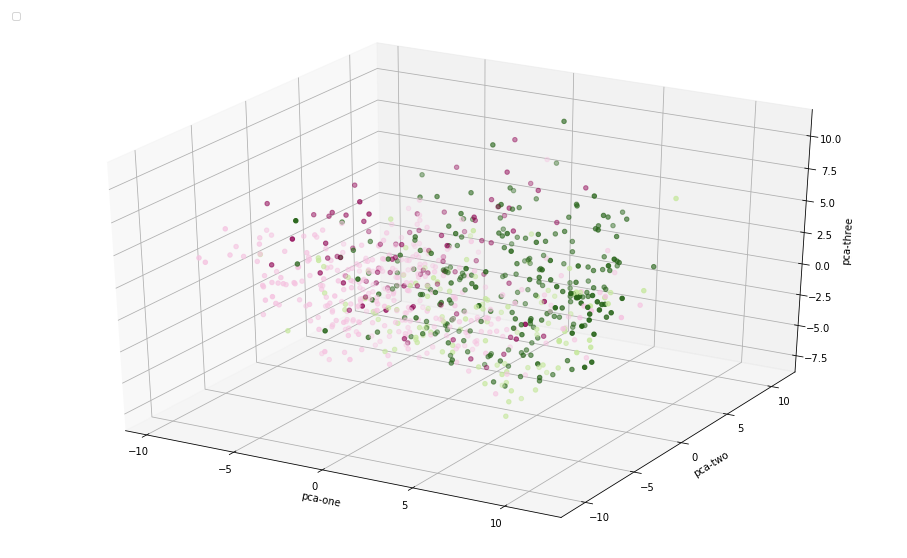

In [25]:
from sklearn import manifold

from mpl_toolkits.mplot3d import Axes3D

ax = plt.figure(figsize=(16,10)).gca(projection='3d')

flatui = ["#E74C3C", "#E67E22", "#F1C40F", "#f96df4",
            "#1ABC9C", "#3498DB"]#, "#9B59B6", "#34495e"]#,
#           ["#18fa05", "#8F4B2D", "#fba3bf", "#95a5a6"]


# sns.scatterplot(
#     x="pca-one", y="pca-two",
#     hue="y",
#     palette=sns.color_palette(flatui), #muted #hls #Set1
#     data=df.loc[rndperm,:],
#     legend=False,
#     alpha=1
# )


ax.scatter(
    xs=df.loc[rndperm,:]["pca-one"], 
    ys=df.loc[rndperm,:]["pca-two"], 
    zs=df.loc[rndperm,:]["pca-three"], 
    c=df.loc[rndperm,:]["y"], 
    cmap = "PiYG"
)

ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')

# custom = [Line2D([], [], marker='.', color="#E74C3C", linestyle='None'),
#          Line2D([], [], marker='.', color="#E67E22", linestyle='None'),
#          Line2D([], [], marker='.', color="#F1C40F", linestyle='None'),
#          Line2D([], [], marker='.', color="#f96df4", linestyle='None'),
#          Line2D([], [], marker='.', color="#1ABC9C", linestyle='None'),
#           Line2D([], [], marker='.', color="#3498DB", linestyle='None')]


plt.legend(loc='upper left')
# plt.legend(custom, ['angry','bored','happy','peace'], loc='upper left')
# plt.legend(custom, ['neutral','calm','happy','sad','angry','fearful'], loc='upper left')
# plt.legend(custom, ['neutral','calm','happy','sad','angry','fearful','disgust','surprised'], loc='upper left')


# # make simple, bare axis lines through space:
# xAxisLine = ((min(df.loc[rndperm,:]["pca-one"]), max(df.loc[rndperm,:]["pca-one"])), (0, 0), (0,0))
# ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
# yAxisLine = ((0, 0), (min(df.loc[rndperm,:]["pca-two"]), max(df.loc[rndperm,:]["pca-two"])), (0,0))
# ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
# zAxisLine = ((0, 0), (0,0), (min(df.loc[rndperm,:]["pca-three"]), max(df.loc[rndperm,:]["pca-three"])))
# ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')


# ax.view_init(60, 30)
# fig


plt.show()

In [23]:
# coding= UTF-8
import numpy as np
import sklearn
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

In [28]:
# Split into train and test sets (400 Audios total)
X_train, X_test, y_train, y_test = train_test_split(temp, temp2, test_size=0.15, random_state=12345678)

# Data scaling (NOT IMPLEMENTING)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.transform(X_test.astype(np.float32))

# Implement simple linear SVM
svm_clf = SVC(C=50.0, gamma = 0.00001, decision_function_shape="ovr") #These parameters can be modified
# svm_clf = SVC(decision_function_shape="ovo") #These parameters can be modified

# Fit model
svm_clf.fit(X_train, y_train) #From Beif github
#svm_clf.fit(X_train_scaled, y_train) # HandsOn book

# Make predictions
#y_pred = svm_clf.predict(X_train_scaled)
y_predict = svm_clf.predict(X_test)

print('Prediction')
print(y_predict)
#print
print("Actual")
print(y_test)

# Accuracy
acc = svm_clf.score(X_test, y_test)
print
print("accuracy=%0.3f" %acc)

Prediction
[4. 4. 2. 4. 2. 4. 2. 2. 4. 2. 4. 4. 2. 4. 2. 2. 2. 2. 2. 4. 4. 2. 4. 4.
 4. 4. 2. 2. 2. 4. 4. 2. 4. 2. 2. 4. 2. 4. 4. 2. 2. 2. 4. 2. 2. 2. 2. 1.
 4. 2. 2. 4. 2. 2. 2. 4. 2. 2. 4. 4. 4. 2. 2. 2. 2. 4. 2. 4. 2. 2. 2. 2.
 2. 2. 2. 2. 4. 2. 2. 2. 2. 2. 2. 2. 2. 4. 2. 4. 4. 4. 2. 4. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 4. 4. 4. 2. 4. 2. 4. 4. 4. 2.]
Actual
[4. 2. 2. 4. 2. 4. 1. 2. 4. 2. 2. 4. 2. 4. 2. 2. 2. 2. 2. 4. 3. 2. 4. 4.
 3. 4. 2. 4. 2. 4. 4. 2. 4. 2. 2. 4. 2. 4. 4. 2. 2. 2. 4. 2. 1. 2. 4. 4.
 4. 3. 2. 3. 2. 2. 2. 2. 2. 3. 4. 1. 3. 2. 3. 3. 2. 3. 2. 3. 3. 2. 2. 1.
 2. 2. 2. 2. 4. 3. 2. 1. 2. 4. 2. 2. 2. 4. 4. 4. 4. 2. 2. 3. 1. 3. 2. 1.
 2. 2. 2. 3. 2. 4. 4. 3. 4. 3. 4. 2. 1. 4. 4. 3.]
accuracy=0.679


In [29]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [30]:
# Plot the confusion matrix DataFrame
labels = ['Q1', 'Q2', 'Q3', 'Q4']

cm = confusion_matrix(y_test, y_predict)
print(classification_report(y_test, y_predict, target_names=labels))

              precision    recall  f1-score   support

          Q1       0.00      0.00      0.00         8
          Q2       0.70      0.92      0.79        52
          Q3       0.00      0.00      0.00        18
          Q4       0.67      0.82      0.74        34

    accuracy                           0.68       112
   macro avg       0.34      0.44      0.38       112
weighted avg       0.53      0.68      0.59       112



/home/mesl/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [31]:
cm_n = np.empty(cm.shape)


for i,c in enumerate(cm):
    cm_n[i] = c/np.float(c.sum())*100.

In [32]:
cm_n

array([[ 0.        , 75.        ,  0.        , 25.        ],
       [ 0.        , 92.30769231,  0.        ,  7.69230769],
       [ 0.        , 55.55555556,  0.        , 44.44444444],
       [ 2.94117647, 14.70588235,  0.        , 82.35294118]])

In [33]:
percs_man = np.array([[86.2,5.2,0.1,6.3,2.2],
               [2.0,93.6,0.1,0.6,3.7],
               [.5,.2,95.9,.1,3.3],
               [6.2,1.1,0.1,92.4,0.2],
               [0.6,3.8,0.7,0.3,94.6]])

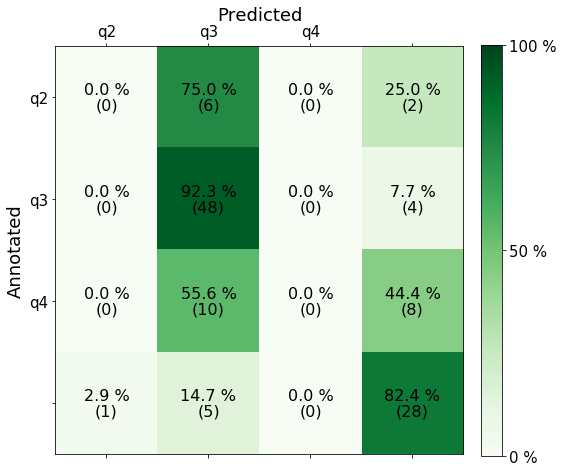

In [34]:
cm_n = np.empty(cm.shape)


for i,c in enumerate(cm):
    cm_n[i] = c/np.float(c.sum())*100.

m,n = cm.shape
cms = cm.sum(axis=1)
cmnorm = cm.copy().astype(float)


for i in range(m):
    cmnorm[i,:] = cm[i,:]/np.float(cms[i])*100
    
fig,ax = plt.subplots(figsize=(8,8))
p = ax.matshow(cm_n,cmap='Greens',vmin=0.,vmax=100.)   #'BrBG')
ax.set_xticklabels( ['q1', 'q2', 'q3', 'q4'],fontsize=15)
ax.set_yticklabels( ['q1', 'q2', 'q3', 'q4'],fontsize=15)



ax.xaxis.set_label_position('top')
ax.set_xlabel('Predicted',fontsize=18)
ax.set_ylabel('Annotated',fontsize=18)
cb = plt.colorbar(p,fraction=0.046, pad=0.04)
cb.set_ticks([0,50,100])
cb.set_ticklabels(['0 %','50 %','100 %'])
cb.ax.tick_params(labelsize=15)

for i in range(m):
    for j in range(n):
        col = 'black'
#         if i == j:
#             col = 'white'
#         else:
#             col = 'black'
        plt.text(j,i,'(%d)' %cm[i,j],horizontalalignment='center',verticalalignment='top',color=col,fontsize=16)
        plt.text(j,i,'%.1f %%' %cm_n[i,j],horizontalalignment='center',verticalalignment='bottom',color=col,fontsize=16)

Normalized confusion matrix


(-0.5, 3.5)

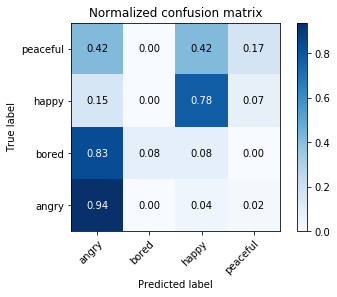

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt     

index =  ['angry', 'bored', 'happy', 'peaceful']
columns =  ['angry', 'bored', 'happy', 'peaceful']


cm_df = pd.DataFrame(cm,columns,index)   
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print("Normalized confusion matrix")

cmap=plt.cm.Blues

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
ax.figure.colorbar(im, ax=ax)
# We want to show all ticks...
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       # ... and label them with the respective list entries
       xticklabels=index, yticklabels=columns,
       title='Normalized confusion matrix',
       ylabel='True label',
       xlabel='Predicted label')

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

normalize= True

fmt = '.2f' if normalize else 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
plt.ylim(-0.5, 3.5)

In [55]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        np.set_printoptions(precision=1)
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.ylim(-0.5, 3.5)
    return ax

Normalized confusion matrix
[[0.12 0.25 0.62 0.  ]
 [0.02 0.74 0.19 0.05]
 [0.02 0.04 0.94 0.  ]
 [0.   0.42 0.5  0.08]]


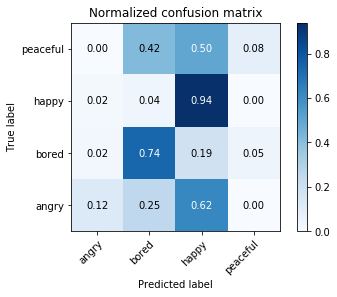

In [56]:
plot_confusion_matrix(y_test, y_predict, classes=labels, normalize=True)


In [57]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Oranges):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(cm.shape[1])
    plt.xticks(tick_marks, rotation=45)
    ax = plt.gca()
    ax.set_xticklabels((ax.get_xticks() +1).astype(str))
    plt.yticks(tick_marks)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.1f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

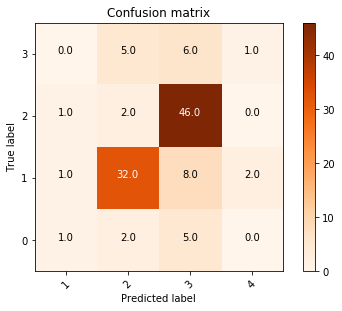

In [59]:

fig, ax = plt.subplots()
plot_confusion_matrix(cm)
plt.ylim(-0.5, 3.5)
plt.show()

In [29]:
# coding= UTF-8
import numpy as np
import keras 
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split

In [30]:


# Split data
X_train, X_test, y_train, y_test = train_test_split(temp, temp2, test_size = 0.15, random_state = 12345678)

# Neural Network Construction
model = Sequential()

# Architecture
model.add(Conv1D(64, 3, activation='relu', input_shape = (512, 1)))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Conv1D(128, 3, activation='relu'))
model.add(Conv1D(128, 3, activation='relu'))
model.add(GlobalAveragePooling1D())
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

# Which is the best loss function for binary (multiple) classification
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])



# Convert label to onehot
y_train = keras.utils.to_categorical(y_train - 1, num_classes=4) # Converts a class vector (integers) to binary class matrix
y_test = keras.utils.to_categorical(y_test - 1, num_classes=4)

X_train = np.expand_dims(X_train, axis=2) # Make 2-dim into 3-dim array to fit model
X_test = np.expand_dims(X_test, axis=2)

# Train Network
model.fit(X_train, y_train, batch_size=64, epochs=10)
print(model.summary())

# Compute accuracy with test data
score, acc = model.evaluate(X_test, y_test, batch_size=16) # Computes the loss & accuracy based on the input you pass it

print('Test score:', score) #loss
print('Test accuracy:', acc)


Epoch 1/10
632/632 [==============================] - 3s 5ms/step - loss: 1.3155 - accuracy: 0.3528
Epoch 2/10
632/632 [==============================] - 3s 4ms/step - loss: 1.2988 - accuracy: 0.3892
Epoch 3/10
632/632 [==============================] - 3s 4ms/step - loss: 1.2960 - accuracy: 0.3797
Epoch 4/10
632/632 [==============================] - 3s 4ms/step - loss: 1.2881 - accuracy: 0.3940
Epoch 5/10
632/632 [==============================] - 2s 3ms/step - loss: 1.2855 - accuracy: 0.3892
Epoch 6/10
632/632 [==============================] - 2s 2ms/step - loss: 1.2873 - accuracy: 0.4114
Epoch 7/10
632/632 [==============================] - 3s 4ms/step - loss: 1.2889 - accuracy: 0.3766
Epoch 8/10
632/632 [==============================] - 3s 4ms/step - loss: 1.2839 - accuracy: 0.4241
Epoch 9/10
632/632 [==============================] - 3s 4ms/step - loss: 1.3054 - accuracy: 0.3892
Epoch 10/10
632/632 [==============================] - 3s 4ms/step - loss: 1.2805 - accuracy: 0.432

In [34]:

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(446, 512, 1)
(298, 512, 1)
(446, 4)
(298, 4)


In [26]:
# coding= UTF-8
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [28]:


X_train, X_test, y_train, y_test = train_test_split(temp, temp2, test_size=0.15, random_state=12345678)

# Build the Neural Network
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=512)) ## Dense method for MLP
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Convert label to onehot
y_train = keras.utils.to_categorical(y_train-1, num_classes=4) # Convert class vector into binary Matrix
y_test = keras.utils.to_categorical(y_test-1, num_classes=4)

# Train and test
model.fit(X_train, y_train, epochs=10, batch_size=64) # Epochs are tunable
print (model.summary())
score, acc = model.evaluate(X_test, y_test, batch_size=32)
print('Test score:', score)
print('Test accuracy:', acc)

Epoch 1/10
632/632 [==============================] - 0s 631us/step - loss: 5.5906 - accuracy: 0.3497
Epoch 2/10
632/632 [==============================] - 0s 287us/step - loss: 1.4617 - accuracy: 0.4066
Epoch 3/10
632/632 [==============================] - 0s 321us/step - loss: 1.3170 - accuracy: 0.4114
Epoch 4/10
632/632 [==============================] - 0s 248us/step - loss: 1.2957 - accuracy: 0.4351
Epoch 5/10
632/632 [==============================] - 0s 294us/step - loss: 1.2897 - accuracy: 0.4557
Epoch 6/10
632/632 [==============================] - 0s 271us/step - loss: 1.3065 - accuracy: 0.4146
Epoch 7/10
632/632 [==============================] - 0s 282us/step - loss: 1.2561 - accuracy: 0.4652
Epoch 8/10
632/632 [==============================] - 0s 276us/step - loss: 1.2669 - accuracy: 0.4715
Epoch 9/10
632/632 [==============================] - 0s 303us/step - loss: 1.2080 - accuracy: 0.4715
Epoch 10/10
632/632 [==============================] - 0s 264us/step - loss: 1.191

In [39]:
# coding= UTF-8
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import pandas as pd 

In [43]:


#Split data
X_train, X_test, y_train, y_test = train_test_split(temp, temp2, test_size=0.15, random_state=0)

# Initialize classifier
gnb_clf= GaussianNB() #check input params

# Train model
gnb_clf.fit(X_train, y_train)
#model = gnb_clf.fit(X_train, y_train)

# Make predictions
prediction = gnb_clf.predict(X_test)

#print('Predicted values')
#print(prediction)
#print
#print('Actual values')
#print(y_test)
#print

# Evaluate accuracy
#Similar ways to do it
#print(accuracy_score(y_test,prediction)) 
print
acc = gnb_clf.score(X_test, y_test) 
print("Accuracy = %0.3f" %acc)

Accuracy = 0.607


In [43]:
# coding= UTF-8
from sklearn.ensemble import RandomForestClassifier #Random Forest classifier
import pandas as pd 
import numpy as np
np.random.seed(0)

In [47]:
# #Load data 
# X = np.load('feat.npy') 
# y = np.load('label.npy').ravel() 

#Split data
X_train, X_test, y_train, y_test = train_test_split(temp, temp2, test_size=0.15, random_state=12345678)

# Initialize classifier
rf_clf = RandomForestClassifier(n_jobs=2, random_state=0) #Check params

# Train model
rf_clf.fit(X_train, y_train)

# Make predictions
y_prediction = rf_clf.predict(X_test)

print('Predicted values')
print(y_prediction)
print
print('Actual values')
print(y_test)
print

# Evaluate accuracy
print
acc = rf_clf.score(X_test, y_test) 
print("Accuracy = %0.3f" %acc)

/home/mesl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Predicted values
[3. 1. 1. 3. 1. 1. 1. 2. 3. 1. 1. 4. 2. 4. 1. 3. 2. 1. 1. 3. 4. 1. 1. 3.
 3. 3. 1. 3. 1. 3. 3. 1. 3. 2. 1. 1. 1. 1. 2. 1. 1. 4. 1. 1. 1. 4. 3. 3.
 3. 3. 1. 3. 1. 1. 1. 1. 2. 2. 3. 1. 3. 4. 3. 3. 3. 1. 1. 3. 3. 1. 1. 1.
 1. 1. 1. 1. 3. 4. 1. 3. 1. 3. 1. 3. 1. 1. 3. 4. 4. 1. 1. 3. 1. 1. 1. 4.
 1. 2. 1. 3. 1. 3. 3. 3. 3. 3. 4. 1. 1. 3. 1. 3.]
Actual values
[3. 2. 2. 3. 2. 4. 1. 2. 3. 1. 2. 4. 1. 3. 1. 2. 2. 1. 1. 3. 3. 1. 4. 3.
 3. 3. 1. 3. 2. 3. 3. 1. 3. 1. 1. 4. 1. 4. 3. 1. 1. 1. 3. 1. 1. 1. 4. 4.
 4. 3. 1. 3. 1. 1. 1. 1. 2. 3. 3. 1. 3. 1. 3. 3. 1. 3. 1. 3. 3. 1. 1. 1.
 1. 1. 1. 2. 3. 3. 1. 1. 1. 3. 2. 1. 1. 3. 3. 4. 3. 1. 1. 3. 1. 3. 1. 1.
 1. 2. 1. 3. 1. 4. 3. 3. 3. 3. 4. 1. 1. 3. 4. 3.]
Accuracy = 0.679


In [48]:
labels = ['q1', 'q2', 'q3', 'q4']

cm = confusion_matrix(y_test, y_predict)

[[93.75        0.          4.16666667  2.08333333]
 [83.33333333  8.33333333  8.33333333  0.        ]
 [15.          0.         77.5         7.5       ]
 [41.66666667  0.         41.66666667 16.66666667]]


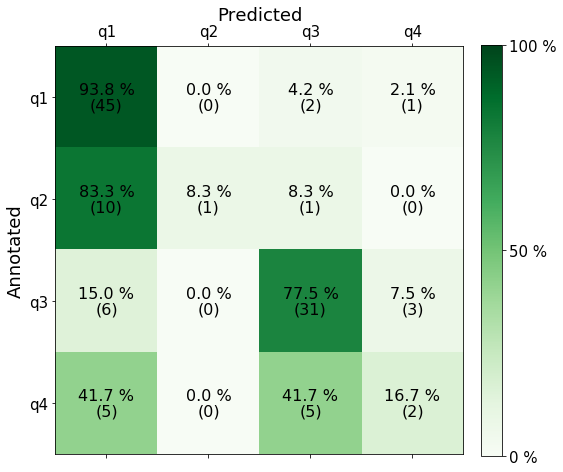

In [50]:
cm_n = np.empty(cm.shape)


for i,c in enumerate(cm):
    cm_n[i] = c/np.float(c.sum())*100.

m,n = cm.shape
cms = cm.sum(axis=1)
cmnorm = cm.copy().astype(float)


for i in range(m):
    cmnorm[i,:] = cm[i,:]/np.float(cms[i])*100
print(cmnorm)
    
fig,ax = plt.subplots(figsize=(8,8))
p = ax.matshow(cm_n,cmap='Greens',vmin=0.,vmax=100.)   #'BrBG')
ax.set_xticklabels( ['0','q1', 'q2', 'q3', 'q4'],fontsize=15)
ax.set_yticklabels( ['0','q1', 'q2', 'q3', 'q4'],fontsize=15)



ax.xaxis.set_label_position('top')
ax.set_xlabel('Predicted',fontsize=18)
ax.set_ylabel('Annotated',fontsize=18)
cb = plt.colorbar(p,fraction=0.046, pad=0.04)
cb.set_ticks([0,50,100])
cb.set_ticklabels(['0 %','50 %','100 %'])
cb.ax.tick_params(labelsize=15)

for i in range(m):
    for j in range(n):
        col = 'black'
#         if i == j:
#             col = 'white'
#         else:
#             col = 'black'
        plt.text(j,i,'(%d)' %cm[i,j],horizontalalignment='center',verticalalignment='top',color=col,fontsize=16)
        plt.text(j,i,'%.1f %%' %cm_n[i,j],horizontalalignment='center',verticalalignment='bottom',color=col,fontsize=16)

In [169]:
# View the predicted probabilities of the first n observations
rf_clf.predict_proba(X_test)[0:10]

array([[0.1, 0. , 0.9, 0. ],
       [0.2, 0. , 0.7, 0.1],
       [0.1, 0.8, 0. , 0.1],
       [0.1, 0.5, 0.3, 0.1],
       [0. , 1. , 0. , 0. ],
       [0.5, 0.3, 0.2, 0. ],
       [0. , 0.2, 0.7, 0.1],
       [0. , 0. , 1. , 0. ],
       [0.5, 0.1, 0.4, 0. ],
       [0. , 0.4, 0.5, 0.1]])

In [171]:
# For future label de-encoding
label_classes = np.array(['Angry','Bored','Happy','Peace'])
print(label_classes)

['Angry' 'Bored' 'Happy' 'Peace']


In [172]:
# Dencoding predicted and actual classes (numeric to written)
prediction_decoded = label_classes[y_prediction]
actual_value_decoded = label_classes[y_test]
#print(y_prediction)
#print(y_test)
print('Prediction decoded')
print(prediction_decoded)
print
print('Actual class decoded')
print(actual_value_decoded)

IndexError: arrays used as indices must be of integer (or boolean) type

In [50]:
# coding= UTF-8
import os
import numpy as np
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers import Dense
from keras.optimizers import Adam

In [51]:


# Split data
X_train, X_test, y_train, y_test = train_test_split(temp, temp2, test_size = 0.15, random_state = 12345678)

#batch_size = 35
# nb_epochs = 400

# Reshape data for LSTM (Samples, Timesteps, Features)
X_train = np.expand_dims(X_train, axis=2) #(280,193,1)
X_test = np.expand_dims(X_test, axis=2)

y_train = keras.utils.to_categorical(y_train - 1, num_classes=4) # Converts a class vector (integers) to binary class matrix
y_test = keras.utils.to_categorical(y_test - 1, num_classes=4)

# Build RNN Neural Network
print('Build LSTM RNN model ...')
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=X_train.shape[1:]))
model.add(LSTM(32, return_sequences=False))
model.add(Dense(y_train.shape[1], activation='softmax'))
#model.add(Dense(10, activation='sigmoid'))

#model.add(LSTM(units=128, dropout=0.05, recurrent_dropout=0.35, return_sequences=True, input_shape=input_shape))
#model.add(LSTM(units=32, dropout=0.05, recurrent_dropout=0.35, return_sequences=False))
#model.add(Dense(units=genre_features.train_Y.shape[1], activation='softmax'))
          
print("Compiling ...")
model.compile(loss='categorical_crossentropy', # for multiple classes
              optimizer='adam', 
              metrics=['accuracy'])

print(model.summary())

print("Training ...")
model.fit(X_train, y_train, batch_size=35, epochs=1000)

print("\nValidating ...")
score, accuracy = model.evaluate(X_test, y_test, batch_size=35, verbose=1)
print("Loss:  ", score)
print("Accuracy:  ", accuracy)

Build LSTM RNN model ...
Compiling ...
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 512, 128)          66560     
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                20608     
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 132       
Total params: 87,300
Trainable params: 87,300
Non-trainable params: 0
_________________________________________________________________
None
Training ...
Epoch 1/1000
632/632 [==============================] - 36s 57ms/step - loss: 1.3083 - accuracy: 0.3861
Epoch 2/1000
632/632 [==============================] - 36s 56ms/step - loss: 1.2857 - accuracy: 0.4051
Epoch 3/1000
632/632 [==============================] - 35s 55ms/step - loss: 1.2797 - accuracy: 0.4051
Epoch 4/100

632/632 [==============================] - 15s 24ms/step - loss: 1.2652 - accuracy: 0.4304
Epoch 149/1000
632/632 [==============================] - 15s 24ms/step - loss: 1.3003 - accuracy: 0.3085
Epoch 150/1000
632/632 [==============================] - 13s 21ms/step - loss: 1.2814 - accuracy: 0.4051
Epoch 151/1000
632/632 [==============================] - 13s 21ms/step - loss: 1.2793 - accuracy: 0.4051
Epoch 152/1000
632/632 [==============================] - 13s 21ms/step - loss: 1.2824 - accuracy: 0.4051
Epoch 153/1000
632/632 [==============================] - 15s 23ms/step - loss: 1.2812 - accuracy: 0.4051
Epoch 154/1000
632/632 [==============================] - 15s 24ms/step - loss: 1.2806 - accuracy: 0.4051
Epoch 155/1000
632/632 [==============================] - 14s 22ms/step - loss: 1.2796 - accuracy: 0.4051
Epoch 156/1000
632/632 [==============================] - 14s 22ms/step - loss: 1.2794 - accuracy: 0.4051
Epoch 157/1000
632/632 [==============================] - 12s

632/632 [==============================] - 15s 24ms/step - loss: 1.0988 - accuracy: 0.5506
Epoch 303/1000
632/632 [==============================] - 14s 21ms/step - loss: 1.0853 - accuracy: 0.5617
Epoch 304/1000
632/632 [==============================] - 13s 21ms/step - loss: 1.0882 - accuracy: 0.5522
Epoch 305/1000
632/632 [==============================] - 13s 21ms/step - loss: 1.0898 - accuracy: 0.5522
Epoch 306/1000
632/632 [==============================] - 15s 23ms/step - loss: 1.1075 - accuracy: 0.5617
Epoch 307/1000
632/632 [==============================] - 15s 24ms/step - loss: 1.1134 - accuracy: 0.5475
Epoch 308/1000
632/632 [==============================] - 14s 22ms/step - loss: 1.0922 - accuracy: 0.5522
Epoch 309/1000
632/632 [==============================] - 14s 22ms/step - loss: 1.0720 - accuracy: 0.5633
Epoch 310/1000
632/632 [==============================] - 13s 20ms/step - loss: 1.0681 - accuracy: 0.5665
Epoch 311/1000
632/632 [==============================] - 14s

632/632 [==============================] - 15s 23ms/step - loss: 0.8172 - accuracy: 0.6472
Epoch 457/1000
632/632 [==============================] - 13s 21ms/step - loss: 0.8591 - accuracy: 0.6551
Epoch 458/1000
632/632 [==============================] - 13s 20ms/step - loss: 0.8321 - accuracy: 0.6693
Epoch 459/1000
632/632 [==============================] - 14s 22ms/step - loss: 0.8274 - accuracy: 0.6630
Epoch 460/1000
632/632 [==============================] - 15s 24ms/step - loss: 0.8512 - accuracy: 0.6472
Epoch 461/1000
632/632 [==============================] - 15s 24ms/step - loss: 0.8583 - accuracy: 0.6519
Epoch 462/1000
632/632 [==============================] - 13s 21ms/step - loss: 0.8193 - accuracy: 0.6693
Epoch 463/1000
632/632 [==============================] - 13s 21ms/step - loss: 0.8322 - accuracy: 0.6756
Epoch 464/1000
632/632 [==============================] - 13s 21ms/step - loss: 0.8919 - accuracy: 0.6408
Epoch 465/1000
632/632 [==============================] - 15s

632/632 [==============================] - 14s 22ms/step - loss: 0.6819 - accuracy: 0.7326
Epoch 611/1000
632/632 [==============================] - 13s 20ms/step - loss: 0.6885 - accuracy: 0.7184
Epoch 612/1000
632/632 [==============================] - 14s 23ms/step - loss: 0.6788 - accuracy: 0.7168
Epoch 613/1000
632/632 [==============================] - 15s 24ms/step - loss: 0.6709 - accuracy: 0.7373
Epoch 614/1000
632/632 [==============================] - 15s 23ms/step - loss: 0.6988 - accuracy: 0.7120
Epoch 615/1000
632/632 [==============================] - 13s 21ms/step - loss: 0.6656 - accuracy: 0.7484
Epoch 616/1000
632/632 [==============================] - 13s 20ms/step - loss: 0.6996 - accuracy: 0.7231
Epoch 617/1000
632/632 [==============================] - 14s 22ms/step - loss: 0.6498 - accuracy: 0.7405
Epoch 618/1000
632/632 [==============================] - 15s 24ms/step - loss: 0.6602 - accuracy: 0.7421
Epoch 619/1000
632/632 [==============================] - 15s

632/632 [==============================] - 13s 21ms/step - loss: 0.7056 - accuracy: 0.7057
Epoch 765/1000
632/632 [==============================] - 13s 21ms/step - loss: 0.7119 - accuracy: 0.6930
Epoch 766/1000
632/632 [==============================] - 15s 23ms/step - loss: 0.8447 - accuracy: 0.6297
Epoch 767/1000
632/632 [==============================] - 15s 24ms/step - loss: 0.8254 - accuracy: 0.6519
Epoch 768/1000
632/632 [==============================] - 14s 22ms/step - loss: 0.8151 - accuracy: 0.6614
Epoch 769/1000
632/632 [==============================] - 14s 21ms/step - loss: 0.8089 - accuracy: 0.6566
Epoch 770/1000
632/632 [==============================] - 13s 20ms/step - loss: 0.8265 - accuracy: 0.6630
Epoch 771/1000
632/632 [==============================] - 14s 23ms/step - loss: 0.7890 - accuracy: 0.6756
Epoch 772/1000
632/632 [==============================] - 15s 24ms/step - loss: 0.7635 - accuracy: 0.6741
Epoch 773/1000
632/632 [==============================] - 14s

632/632 [==============================] - 14s 22ms/step - loss: 0.3514 - accuracy: 0.8718
Epoch 919/1000
632/632 [==============================] - 15s 24ms/step - loss: 0.4508 - accuracy: 0.8275
Epoch 920/1000
632/632 [==============================] - 15s 24ms/step - loss: 0.4289 - accuracy: 0.8354
Epoch 921/1000
632/632 [==============================] - 13s 21ms/step - loss: 0.3472 - accuracy: 0.8703
Epoch 922/1000
632/632 [==============================] - 13s 21ms/step - loss: 0.3538 - accuracy: 0.8671
Epoch 923/1000
632/632 [==============================] - 13s 21ms/step - loss: 0.3699 - accuracy: 0.8608
Epoch 924/1000
632/632 [==============================] - 15s 23ms/step - loss: 0.4490 - accuracy: 0.8307
Epoch 925/1000
632/632 [==============================] - 15s 24ms/step - loss: 0.7088 - accuracy: 0.7120
Epoch 926/1000
632/632 [==============================] - 14s 22ms/step - loss: 1.1077 - accuracy: 0.6092
Epoch 927/1000
632/632 [==============================] - 14s

In [55]:
import pandas as pd

df = pd.DataFrame({'SVM': [64.1],
                   'CNN': [57.38],
                   'MLP':[65.77],
                   'NB': [61],
                   'RF': [66.1],
                   'RNN': [62.90],})
df

,SVM,CNN,MLP,NB,RF,RNN
0,64.1,57.38,65.77,61,66.1,62.9
